와인 데이터셋: https://www.kaggle.com/brynja/wineuci

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'parkjaeyoung' # username
os.environ['KAGGLE_KEY'] = '4c16bfdb89a9449e8972bbc76d2f95aa' # key
!kaggle datasets download -d brynja/wineuci


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #원핫 인코딩

In [3]:
df = pd.read_csv('Wine.csv')

df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## 헤더 내용 채우기

In [4]:
df = pd.read_csv('Wine.csv', names=[
  'name'
  ,'alcohol'
  ,'malicAcid'
  ,'ash'
  ,'ashalcalinity'
  ,'magnesium'
  ,'totalPhenols'
  ,'flavanoids'
  ,'nonFlavanoidPhenols'
  ,'proanthocyanins'
  ,'colorIntensity'
  ,'hue'
  ,'od280_od315'
  ,'proline'
])

df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df.columns = [
  'name'
  ,'alcohol'
  ,'malicAcid'
  ,'ash'
  ,'ashalcalinity'
  ,'magnesium'
  ,'totalPhenols'
  ,'flavanoids'
  ,'nonFlavanoidPhenols'
  ,'proanthocyanins'
  ,'colorIntensity'
  ,'hue'
  ,'od280_od315'
  ,'proline'
]

<AxesSubplot:xlabel='name', ylabel='count'>

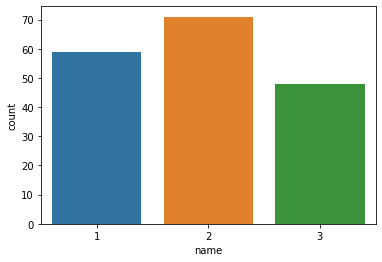

In [11]:
sns.countplot(x = df['name'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 178 non-null    int64  
 1   alcohol              178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalcalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
print(df.isnull().sum()) #비어있는 데이터 확인

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


In [15]:
x_data = df.drop(columns = ['name'], axis = 1)
x_data = x_data.astype(np.float32)
x_data.head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
y_data = df[['name']]
y_data = y_data.astype(np.float32) # float를 넣는 이유?
y_data.head()

,name
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## 데이터 표준화


In [ ]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])


## One-hot encoding

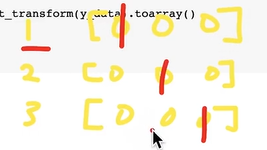

In [20]:
encoder = OneHotEncoder()
y_data_encoded = encoder.fit_transform(y_data).toarray()
print(y_data.values[0])
print(y_data_encoded[0])

[1.]
[1. 0. 0.]


## 학습/검증 데이터 분할


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(142, 13) (36, 13)
(142, 3) (36, 3)


## 모델 학습


In [22]:
model = Sequential([
    Dense(3, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(lr=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs = 20
)


Epoch 1/20
5/5 [==============================] - 0s 94ms/step - loss: 1.3367 - acc: 0.2817 - val_loss: 0.8330 - val_acc: 0.5556
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7912 - acc: 0.6338 - val_loss: 0.5482 - val_acc: 0.8056
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5007 - acc: 0.8099 - val_loss: 0.3874 - val_acc: 0.8333
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3480 - acc: 0.8944 - val_loss: 0.2908 - val_acc: 0.8611
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2582 - acc: 0.9507 - val_loss: 0.2320 - val_acc: 0.9444
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2048 - acc: 0.9577 - val_loss: 0.1913 - val_acc: 0.9722
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1702 - acc: 0.9718 - val_loss: 0.1639 - val_acc: 0.9722
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1449 - acc: 0.9789 - val_loss: 